In [1]:
#import the required libraries including OpenCV
import cv2
#image processing utility functions
#install by running - pip install imutils
import imutils

original_path = 'test/1.png'
new_path = 'test/2.png'

In [2]:
original = cv2.imread(original_path)
new = cv2.imread(new_path)

height, width = original.shape[:2]

original = imutils.resize(original)
new = imutils.resize(new, width, height)

In [3]:
diff = original.copy()
cv2.absdiff(original, new, diff)

gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

In [4]:
import matplotlib.pyplot as plt

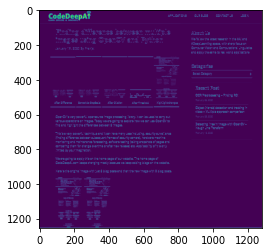

In [5]:
plt.imshow(gray)

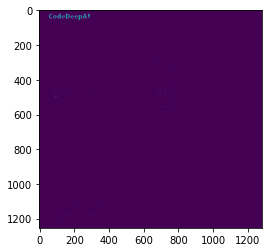

In [48]:
for i in range(0, 2):
    dilated = cv2.erode(gray.copy(), None, iterations = i + 1)
    
plt.imshow(dilated)

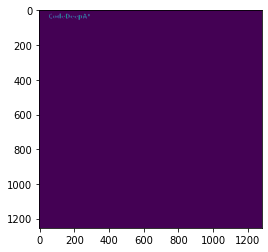

In [49]:
(T, thresh) = cv2.threshold(dilated, 170, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)
 
cnts = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(new, (x, y), (x + w, y + h), (0, 255, 0), 2)

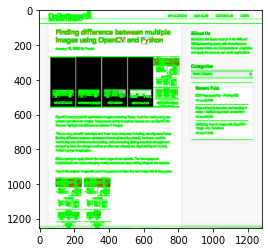

In [50]:
plt.imshow(new)

In [47]:
cv2.imwrite('changes.png', new)

True